In [1]:
# this are the importand includes used 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = pd.read_csv("dataSet/attackMode0.csv")
dataset

,Duration sec,Tx packets,Rx packets,Tx bytes,Rx bytes,Type,Type.1
0,"296,296,296","0,156100,156100","0,156080,156080","0,8432533,8432497","0,8428560,8428560",OFPT_MULTIPART_REPLY,OFPMP_PORT_STATS
1,"301,301,301","0,178839,178838","0,178818,178818","0,9660439,9660349","0,9656412,9656412",OFPT_MULTIPART_REPLY,OFPMP_PORT_STATS
2,"306,306,306","0,202832,202831","0,202811,202811","0,10956049,10955959","0,10952022,10952022",OFPT_MULTIPART_REPLY,OFPMP_PORT_STATS
3,"311,311,311","0,226949,226949","0,226929,226929","0,12258355,12258319","0,12254382,12254382",OFPT_MULTIPART_REPLY,OFPMP_PORT_STATS
4,"316,316,316","0,251056,251056","0,251036,251036","0,13560133,13560097","0,13556160,13556160",OFPT_MULTIPART_REPLY,OFPMP_PORT_STATS
...,...,...,...,...,...,...,...
454,"2568,2568,2568","0,10904204,10904204","0,10904177,10904178","0,588828736,588828700","0,588824178,588824232",OFPT_MULTIPART_REPLY,OFPMP_PORT_STATS
455,"2573,2573,2573","0,10927395,10927395","0,10927369,10927369","0,590081050,590081014","0,590076546,590076546",OFPT_MULTIPART_REPLY,OFPMP_PORT_STATS
456,"2578,2578,2578","0,10950444,10950443","0,10950417,10950417","0,591325696,591325606","0,591321138,591321138",OFPT_MULTIPART_REPLY,OFPMP_PORT_STATS
457,"2583,2583,2583","0,10973158,10973157","0,10973131,10973131","0,592552252,592552162","0,592547694,592547694",OFPT_MULTIPART_REPLY,OFPMP_PORT_STATS


In [3]:
portTxbytes = (dataset['Tx bytes'])
portTxpackets = (dataset['Tx packets'])


print(portTxbytes[0:5],portTxpackets[0:5])

print(len(portTxbytes),len(portTxpackets))

0      0,8432533,8432497
1      0,9660439,9660349
2    0,10956049,10955959
3    0,12258355,12258319
4    0,13560133,13560097
Name: Tx bytes, dtype: object 0    0,156100,156100
1    0,178839,178838
2    0,202832,202831
3    0,226949,226949
4    0,251056,251056
Name: Tx packets, dtype: object
459 459


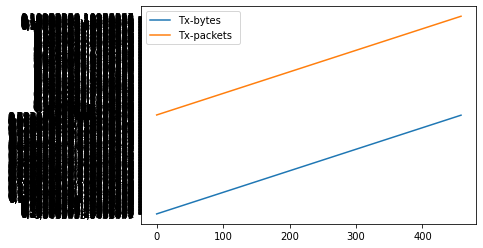

In [4]:
plt.plot(portTxbytes)
plt.plot(portTxpackets)
plt.legend(['Tx-bytes', 'Tx-packets '])

In [5]:
hostTxbytes = []
hostTxpackets =  []
for i in portTxbytes:  
    splitTins = i.split(',') 
    newArray = np.array(splitTins)    
    hostTxbytes.append(newArray)       




for j in portTxpackets:  
    split_packs = j.split(',') 
    new_split_pack = np.array(split_packs)    
    hostTxpackets.append(new_split_pack)       


print(len(hostTxbytes))
print(len(hostTxpackets))

459
459


In [6]:
hostTxbytes_np = np.array(hostTxbytes)
newTxBytes = hostTxbytes_np.astype(np.int)


hostTxpackets_np = np.array(hostTxpackets)
newTxPackets = hostTxpackets_np.astype(np.int)


print(newTxBytes.shape)
print("-------")
print(newTxPackets.shape)

(459, 3)
-------
(459, 3)


In [7]:
host1Txbytes = []
host1Txpackets = []

hostNumber = 1

for i in list(newTxBytes):
    host1Txbytes.append(i[hostNumber])
    
host1Txbytes_np = np.array(host1Txbytes)
host1Txbytes_diff = (np.diff(host1Txbytes_np))



for j in list(newTxPackets):
    host1Txpackets.append(j[hostNumber])
    
host1Txpackets_np = np.array(host1Txpackets)
host1Txpackets_diff = (np.diff(host1Txpackets_np))
    




print(host1Txbytes_diff.shape)
print("----")
print(host1Txpackets_diff.shape)   

(458,)
----
(458,)


Text(0.5, 1.0, 'Normal Traffic if 5 seconds interval')

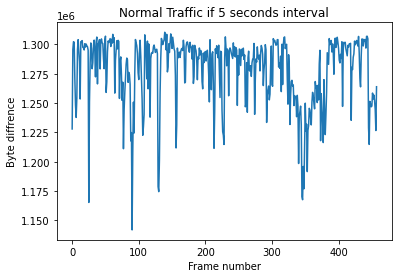

In [8]:
plt.plot(host1Txbytes_diff)

plt.xlabel('Frame number')
plt.ylabel('Byte diffrence')
plt.title("Normal Traffic if 5 seconds interval")






Text(0.5, 1.0, 'Normal Traffic if 5 seconds interval')

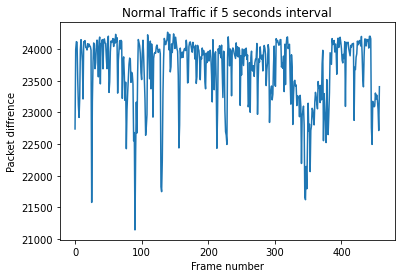

In [9]:

plt.plot(host1Txpackets_diff)
plt.xlabel('Frame number')
plt.ylabel('Packet diffrence')

plt.title("Normal Traffic if 5 seconds interval")

In [10]:
txbytesDf = pd.DataFrame(host1Txbytes_diff, columns=['Tx byte difference '])
txpacketsDf = pd.DataFrame(host1Txpackets_diff, columns=['Tx packets differnce'])
statusDF = pd.DataFrame(np.ones(len(txbytesDf)), columns=['status'])


In [11]:

comp__ = [txbytesDf,txpacketsDf,statusDF]


result = pd.concat(comp__, axis=1, join='inner')

result

,Tx byte difference,Tx packets differnce,status
0,1227906,22739,1.0
1,1295610,23993,1.0
2,1302306,24117,1.0
3,1301778,24107,1.0
4,1270944,23536,1.0
...,...,...,...
453,1256796,23274,1.0
454,1252314,23191,1.0
455,1244646,23049,1.0
456,1226556,22714,1.0


In [12]:
result.to_csv("dataSet/finalData_attack.csv")